In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import image as mping
import pylab

import mahotas as mh
import os
import copy

In [2]:
mainPath = "../Sequences"

dataSet01 = mainPath + "01"
dataSet02 = mainPath + "02"
dataSet03 = mainPath + "03"
dataSet04 = mainPath + "04"

In [3]:
img_list = os.listdir('../Sequences/01')
img_list = img_list[1:]

In [6]:
def pre_processing2(gray_img):
    
#     ----------- Pre Processing -----------
    
#     ----------- Gamma Filtering -----------

    gamma_filter = copy.deepcopy(gray_img)
    rows, cols = gamma_filter.shape[0], gamma_filter.shape[1]
    for i in range(rows):
        for j in range(cols):
            gamma_filter[i][j] = 10 * pow(gamma_filter[i][j], 2.5)
            
    gamma_img = cv2.GaussianBlur(gamma_filter, (9,9), 0)
    
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(gray_img, cmap = 'gray'), plt.title('Original Gray Image')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(gamma_img, cmap = 'gray'), plt.title('Gamma Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(gray_img), plt.title('Original Gray Image')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(gamma_img), plt.title('Gamma Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
#     ----------- Thresholding Original and Gamma Images -----------
    
    ret_val_gray_img, treshold_gray_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ret_val, treshold = cv2.threshold(gamma_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(treshold_gray_img, cmap = 'gray'), plt.title('Threshold Original Image')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(treshold, cmap = 'gray'), plt.title('Threshold Gamma Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()

#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(treshold_gray_img), plt.title('Threshold Original Image')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(treshold), plt.title('Threshold Gamma Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
#     ----------- Filling the holes in the threshold image -----------
    
    filled_img = treshold.copy()
    cv2.floodFill(filled_img, None, (0,0), 1)
    for i in range(treshold.shape[0]):
        for j in range(treshold.shape[1]):
            if filled_img[i,j] == 0:
                treshold[i,j] = 255
                
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(treshold), plt.title('Final Processed Image')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(treshold, cmap = 'gray'), plt.title('Final Processed Image - Gray Map')
#     plt.xticks([]), plt.yticks([])
#     plt.show()

#     plt.imshow(treshold, cmap = 'gray'), plt.title('Filled Threshold Gamma Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
#     plt.imshow(treshold), plt.title('Filled Threshold Gamma Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()



#     ----------- Segmentation -----------

    gaussian_img = cv2.GaussianBlur(gray_img, (13,13), 2.5)
#     T = mh.thresholding.otsu(gaussian_img)
    
    T = mh.thresholding.otsu(treshold)
    rmax = mh.regmax(gaussian_img)
    labeled, nr_nuclei = mh.label(rmax > T)
    
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(labeled), plt.title('Label Image')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(mh.overlay(gray_img, rmax)), plt.title('Cells Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
    #     Contrast Stretching    
    dist = mh.distance(treshold > T)
    dist = dist.max() - dist
    dist -= dist.min()
    dist = dist/float(dist.ptp()) * 255
    dist = dist.astype(np.uint8)

#     Watershed Image
    seeds, nr_nuclei = mh.label(rmax)
    nuclei = mh.cwatershed(dist, seeds)
    
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(dist), plt.title('Contrast Stretching')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(seeds), plt.title('Seeds Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
#     plt.figure(figsize = (20,10))
#     plt.subplot(1,2,1), plt.imshow(nuclei), plt.title('Watershed')
#     plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(seeds), plt.title('Cells Image')
#     plt.xticks([]), plt.yticks([])
#     plt.show()
    
    
#     Finding Contours
    labeled = labeled.astype(np.uint8)
    img = labeled.copy()
    binary, contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = cv2.drawContours(img, contours, -1, (0,0,255), 6)
    
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1), plt.imshow(contour_img), plt.title('Contours')
    plt.xticks([]), plt.yticks([])
#     plt.subplot(1,2,2), plt.imshow(nuclei), plt.title('Watershed Image')
#     plt.xticks([]), plt.yticks([])
    plt.show()
    
    
#     ----------- Boundaries -----------    
    
    for i in range(0,len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        img_rect = cv2.rectangle(seeds, (x, y), (x + w, y + h), (125,125,0), 3)
        cv2.circle(seeds, (x + int(w/2), y + int(h/2)), 7, 128, -1)    
    
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1), plt.imshow(seeds), plt.title('Boundary')
    plt.xticks([]), plt.yticks([])
    plt.show()

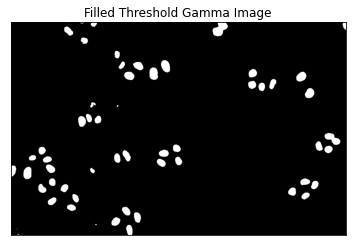

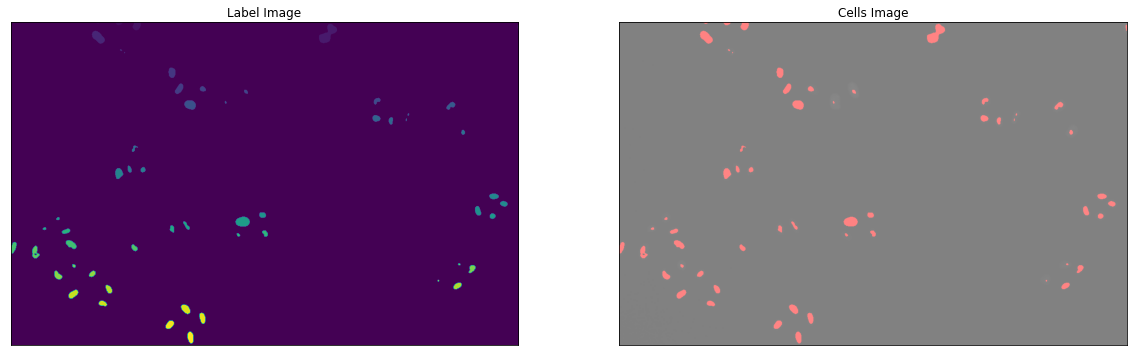

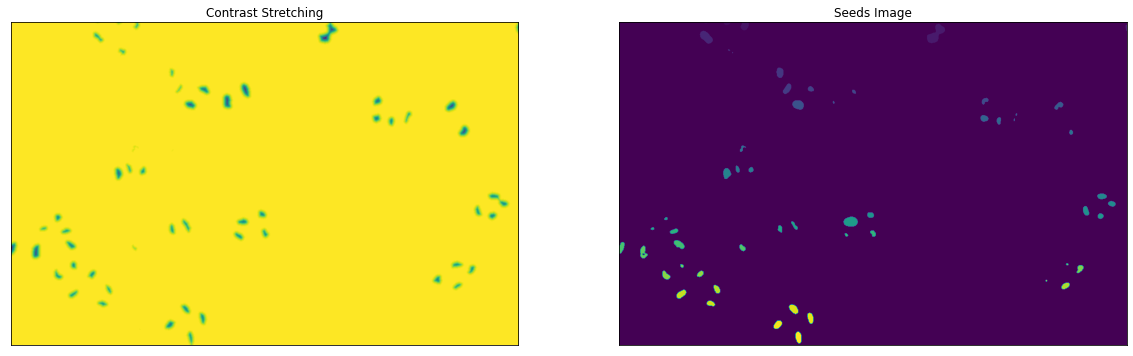

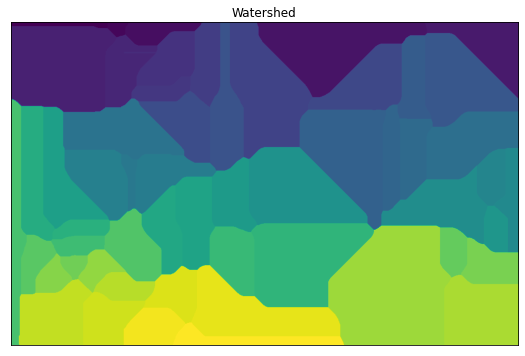

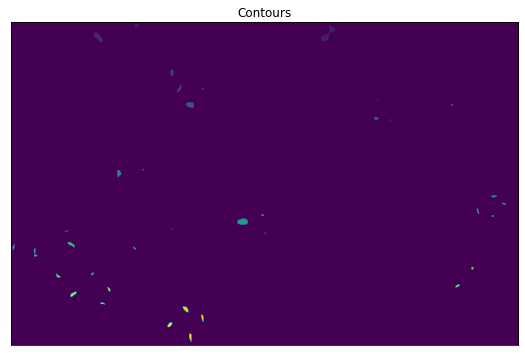

In [5]:
for i in img_list:
    cur_img = cv2.imread(f'/Users/muqaddis/Documents/COMP9517/GroupProject/Sequences/01/{i}', 1)

gray_img = cv2.cvtColor(cur_img, cv2.COLOR_BGR2GRAY)
pre_processing2(gray_img)

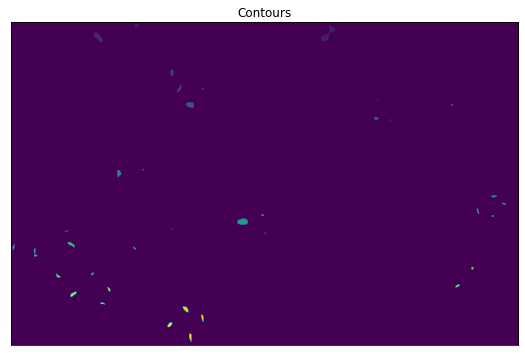

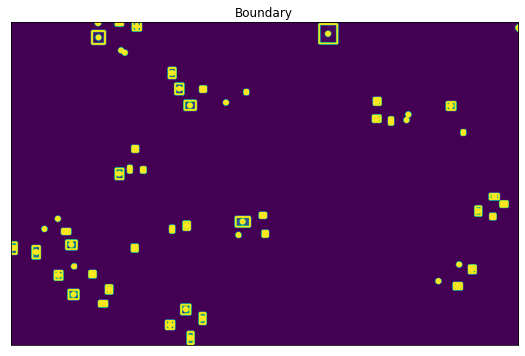

In [7]:
# Boundary

for i in img_list:
    cur_img = cv2.imread(f'/Users/muqaddis/Documents/COMP9517/GroupProject/Sequences/01/{i}', 1)

gray_img = cv2.cvtColor(cur_img, cv2.COLOR_BGR2GRAY)
pre_processing2(gray_img)